<a href="https://colab.research.google.com/github/NMashalov/Ru-manim-tutorial/blob/main/Manim_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!sudo apt update && sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev \
    texlive-lang-cyrillic

!pip install manim
!pip install IPython --upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,068 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,342 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/m

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 which is incompatible.


In [ ]:
# перезапускаемся
import os
os.kill(os.getpid(), 9)

In [125]:
# проверяем, что все работает :)
from manim import (
    Scene,
    FadeIn, FadeOut,
    Group, VGroup,
    Transform,
    Text,Tex,MathTex, Write,
    LaggedStart,
    DOWN, UP, LEFT, RIGHT,
    RED, BLUE, GREEN, WHITE, PURPLE, YELLOW, GRAY
)

# включаем русский язык для tex
from manim import TexTemplate
TexTemplate.default_preamble = r'''
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{amsthm}
\usepackage[T1,TS1,T2A]{fontenc}
\usepackage[utf8]{inputenc}
\usepackage[russian,english]{babel}'''

## Работа в 3d пространстве

In [95]:
from manim import ThreeDScene,ThreeDAxes, DEGREES, Line, DashedLine, ArcBetweenPoints,MathTex

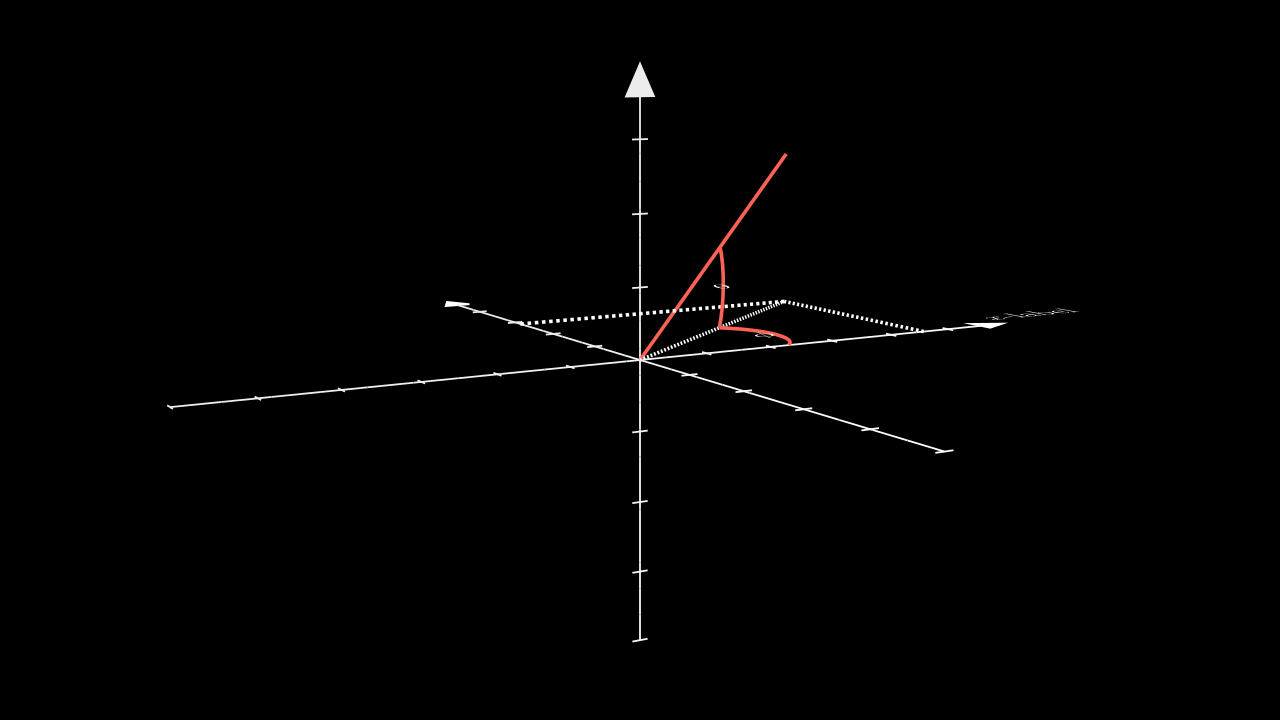

In [123]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
     def construct(self):
        ax = ThreeDAxes()
        self.add(ax)
        self.set_camera_orientation(phi=80*DEGREES,theta=240*DEGREES)

        main_line        = Line((0,0,0),(4,3,2),color=RED)
        vertical_line    = DashedLine((4,0,0),(4,3,0))
        horizontal_line  = DashedLine((0,3,0),(4,3,0))
        fall_line        = DashedLine((4,3,0),(4,3,2))
        fall_line        = DashedLine((0,0,0),(4,3,0))

        lab = ax.get_x_axis_label(Tex("$x$-label"))

        arc_polar = ArcBetweenPoints(start=(4 /2,3 /2 ,0), end=(4/2,3 / 2,2 /2 ), stroke_color=RED)

        arc_azimuth = ArcBetweenPoints(start=(4 /2,0 ,0), end=(4/2,3 / 2, 0 ), stroke_color=RED)

        self.add(
             main_line,
             vertical_line,
             horizontal_line,
             fall_line,
             arc_polar,
             MathTex(r'\theta').move_to(arc_polar),
             arc_azimuth,
             MathTex(r'\phi').move_to(arc_azimuth),
             lab,
        )

### Работа с камерой 3d



In [148]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        self.add_fixed_in_frame_mobjects(Text('Плавно перемещаем камеру').to_edge(UP))
        axes = ThreeDAxes()
        self.add(axes)
        # изначальная позиция 20 градусов
        self.move_camera(phi=60 *  DEGREES, theta=20 * DEGREES)
        self.wait()
        self.move_camera(frame_center=(0,2,0))
        self.wait()


In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        # изначальная позиция 20 градусов
        self.wait()


### Явная работа с параметрами камеры

In [149]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
  def construct(self):
    self.set_camera_orientation(phi= np.pi / 6, theta= np.pi / 6)
    phi, theta, focal_distance, gamma, distance_to_origin = self.camera.get_value_trackers()

    self.add(ThreeDAxes())
    self.wait()
    self.play(phi.animate.set_value(50*DEGREES))
    self.play(theta.animate.set_value(50*DEGREES))
    #self.play(gamma.animate.set_value(1))
    self.play(distance_to_origin.animate.set_value(2))
    self.wait()

### Тренировка
 камеру

In [14]:
from manim import Sphere

In [146]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        self.set_camera_orientation(phi=60 *  DEGREES, theta=240 *  DEGREES)
        sphere = Sphere(
            center=(0, 3, 0),
            radius=1
        )
        self.add(sphere)
        self.wait()


### ⚠️ Текст в 3d ведет себя непредсказуемо


Используйте
```python
self.add_fixed_in_frame_mobjects(t1)
```
для того, чтобы написать текста "на камере"

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):

        t = Text('Текст в 3d').scale(2)
        self.add(t)
        # повороты
        self.move_camera(phi=180 * DEGREES)
        self.wait()
        self.move_camera(theta=20 * DEGREES)
        self.wait()
        self.move_camera(theta=20 * DEGREES,phi=50 * DEGREES)
        self.wait()




### Геометрические фигуры в 3D

In [153]:
from manim import  Tetrahedron, Cube, Octahedron

In [156]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        self.set_camera_orientation(phi=60 * DEGREES, theta=30 * DEGREES)

        t1 = Text('Тетраэдр').to_edge(UP)
        t2 = Text('Куб').to_edge(UP)
        t3 = Text('Октаэдр').to_edge(UP)

        self.add_fixed_in_frame_mobjects(t1)

        obj1 = Tetrahedron()
        obj2 = obj1.replace(Cube(),stretch=True)
        obj3 =  obj1.replace(Octahedron(),stretch=True)

        self.add(obj1)

        self.wait()

        self.play(
            Transform(obj1, obj2),
            Transform(t1,t2)
        )
        self.wait()



In [ ]:
from manim import Prism

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):]
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)

        cuboid = Prism()
        cuboid.replace(Shere(), stretch=True)

        cuboid.set_fill(color, opacity=fill_opacity)

        self.play(
            c
        )







In [ ]:
from manim import *

class IcosahedronScene(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)

        self.add(obj)

In [ ]:
        self.set_camera_orientation

In [ ]:
import numpy as np
from manim import ParametricFunction

### Тренировка 🏋️

Преобразуйте сферу в треугольник плавно вращая камеру по азимутальной оси

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        self.set_camera_orientation(phi=np.pi / 6, theta=np.pi / 6)
        sphere1 = Sphere(
            center=(0, 0, 0),
            radius=1
        )
        self.add(sphere1 )
        self.wait()
        self.move_camera(theta=20 * DEGREES,focal_distnace=6)
        self.wait()

### Параметрические кривые и поверхности

In [ ]:
%%manim -qm -v WARNING ManimScene
class ManimScene(ThreeDScene):
    def construct(self):

        curve1 = ParametricFunction(
            lambda u: np.array([
                1.2 * np.cos(u),
                1.2 * np.sin(u),
                u * 0.05
            ]), color=RED, t_range = np.array([-3, 5, 0.01])
        ).set_shade_in_3d(True)

        self.add(curve1)

        self.wait()
        self.move_camera(phi=60 * DEGREES)


        self.begin_ambient_camera_rotation(
            rate=np.pi / 10, about="theta"
        )

        t = Text('Фиксируем текст').scale(2)

        self.add_fixed_in_frame_mobjects(t)

        self.wait()

In [ ]:
 from manim import Surface

In [ ]:
%%manim -qm -v WARNING ParaSurface

class ParaSurface(ThreeDScene):
    def func(self, u, v):
        return np.array([np.cos(u) * np.cos(v), np.cos(u) * np.sin(v), u])


    def construct(self):
        axes = ThreeDAxes(x_range=[-4,4], x_length=8)
        surface = Surface(
            lambda u, v: axes.c2p(*self.func(u, v)),
            u_range=[-np.pi, np.pi],
            v_range=[0, 2*np.pi],
            resolution=8,
        )
        self.set_camera_orientation(theta=70 * DEGREES, phi=75 * DEGREES)
        self.add(axes)
        self.play(Write(surface))
        self.wait()


In [ ]:
from manim import ParametricSurface

In [127]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):

    def construct(self):

        cuboids2 = self.show_the_riemmann_sum(
                lambda x, y: np.array([x, y, self.Func(x, y)]),
                fill_opacity=1,
                dl=0.25,
                start_color=BLUE,
                end_color=BLUE_E,
        )

AttributeError: 'ManimScene' object has no attribute 'show_the_riemmann_sum'

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        resolution_fa = 8
        self.set_camera_orientation(phi=75 * DEGREES, theta=-160 * DEGREES)
        axes = ThreeDAxes(x_range=(0, 5, 1), y_range=(0, 5, 1), z_range=(-1, 1, 0.5))
        def param_surface(u, v):
            z = np.sin(u) * np.cos(v)
            return z
        surface_plane = Surface(
            lambda u, v: axes.c2p(u, v, param_surface(u, v)),
            resolution=(resolution_fa, resolution_fa),
            v_range=[0, 5],
            u_range=[0, 5],
            )
        surface_plane.set_style(fill_opacity=1)
        surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)
        self.add(axes, surface_plane)

In [ ]:
cuboid = Prism(
                    dimensions=[dl, dl, surface_val[-1]]
                )
                cuboid.replace(points, stretch=True)

## Работа с камерой в 2D

In [3]:
from manim import MovingCameraScene, Restore

In [4]:
%%manim -qm -v WARNING ManimScene

class ManimScene(MovingCameraScene):
    def construct(self):
        text = Text("Меняем ширину кадра")
        self.add(text)
        self.camera.frame.save_state()
        self.play(self.camera.frame.animate.set(width=text.width * 1.2), run_time = 5)
        self.wait(0.3)
        self.play(Restore(self.camera.frame))

In [9]:
from manim import Axes, Dot, Restore
import numpy as np

In [78]:
%%manim -qm -v WARNING ManimScene
class ManimScene(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()
        self.add(Text(''))
        self.wait(2)

        ax = Axes(x_range=[-1, 10], y_range=[-1, 10])
        graph = ax.plot(lambda x: np.sin(x), color=WHITE, x_range=[0, 3 * np.pi])

        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))
        self.add(ax, graph, dot_1, dot_2)

        self.play(self.camera.frame.animate.scale(0.5).move_to(dot_1))
        self.play(self.camera.frame.animate.move_to(dot_2))
        self.play(Restore(self.camera.frame))
        self.wait()

### Тренировка 🏋️

Обойдем все углы треугольника и вернемся в исходное положение

In [82]:
from manim import Triangle

In [86]:
%%manim -qm -v WARNING ManimScene
class ManimScene(MovingCameraScene):
    def construct(self):
        # камера запоминает свои настройки для Restore
        self.camera.frame.save_state()

        self.add(Triangle().scale(2))

        self.play(self.camera.frame.animate.scale(0.5).move_to((0,2,0)))

        # self.play(self.camera.frame.animate.scale(0.5).move_to((0,2,0)))
        # self.play(self.camera.frame.animate.scale(0.5).move_to((0,2,0)))

        self.wait()

## Векторная сцена

### Деформация пространства

In [59]:
# включаем русский язык для tex
from manim import VectorScene, LinearTransformationScene

In [66]:
%%manim -qm -v WARNING ManimScene
class ManimScene(LinearTransformationScene):
    def construct(self):
        self.add(Text('Линейные преобразования').to_edge(UP))
        unit_square = self.get_unit_square()
        vect = self.get_vector([1, -2])

        self.add_transformable_mobject(vect, unit_square, Text('Можно и так').move_to(2* UP))

        matrix = [[1, 1], [0, 1]]
        self.apply_matrix(matrix)
        self.wait()

### Вектонное пространство

In [75]:
%%manim -qm -v WARNING Vectors

class Vectors(VectorScene):
    def construct(self):
        plane = self.add_plane()
        self.add(Text('Работа с базисом').to_edge(UP))
        self.wait()

        vector = self.add_vector([-3, -2], color=RED)
        self.vector_to_coords(vector=vector)

        vector2 = self.add_vector([2, 2])
        self.write_vector_coordinates(vector=vector2)

### Векторные поля

In [ ]:
from manim import ArrowVectorField,  Circle, Scene

In [76]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[1] / 2) * RIGHT + np.cos(pos[0] / 2) * UP
        vector_field = ArrowVectorField(
            func, x_range=[-7, 7, 1], y_range=[-4, 4, 1], length_func=lambda x: x / 2
        )
        self.add(vector_field)
        circle = Circle(radius=2).shift(LEFT)
        self.add(circle.copy().set_color(BLUE))
        dot = Dot().move_to(circle)

        vector_field.nudge(circle, -2, 60, True)
        vector_field.nudge(dot, -2, 60)

        circle.add_updater(vector_field.get_nudge_updater(pointwise=True))
        dot.add_updater(vector_field.get_nudge_updater())
        self.add(circle, dot)
        self.wait(6)

### Движение по траектории

In [129]:
from manim import Circle, TracedPath

In [132]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        a = Dot(RIGHT * 2)
        b = TracedPath(a.get_center)
        self.add(a, b)
        self.play(a.animate(path_arc=np.pi / 4).shift(LEFT * 2))
        self.play(a.animate(path_arc=-np.pi / 4).shift(LEFT * 2))
        self.wait()

In [ ]:
from manim import Sphere, Circle, MoveAlongPath,linear

In [ ]:
%%manim -qm -v WARNING ManimScene

class ThreeDCameraRotation(ThreeDScene):
 def construct(self):
    self.camera.background_color = WHITE

    self.set_camera_orientation(phi=0 * DEGREES, theta=0* DEGREES)

    axes = ThreeDAxes()
    circle = Circle(radius=1, color=RED)

    self.add(circle, axes)

    sphere = Sphere(radius=0.1,color=RED).shift(RIGHT)
    #completed the setup

    self.play(MoveAlongPath(sphere, circle), run_time=3, rate_func=linear)
    #circular motion

    self.move_camera(phi=90 * DEGREES, theta=0 * DEGREES,run_time =2)
    #Camera movement

    self.wait()

    self.move_camera(phi=0 * DEGREES, theta=0 * DEGREES)
    #again camera movement
    self.wait()

### Тренировка

## 📝 Домашнее задание

На выбор:
- решение задачи по стереометрии из ЕГЭ
- работа с 3d

## 🏃 Следующее занятие

Разбор продвинутых анимаций

In [137]:
from manim import DecimalNumber, Rectangle

In [139]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        decimal = DecimalNumber().to_edge(UP)
        rect = Rectangle(color=BLUE)
        rect_copy = rect.copy().set_stroke(RED, opacity=0.5)

        decimal.add_updater(lambda d: d.set_value(rect.height))

        self.add(rect_copy, rect, decimal)
        self.play(rect.animate.set(height=5))
        self.wait()

In [41]:
!pip install -q manim-physics

In [44]:
from manim_physics import Charge, ElectricField

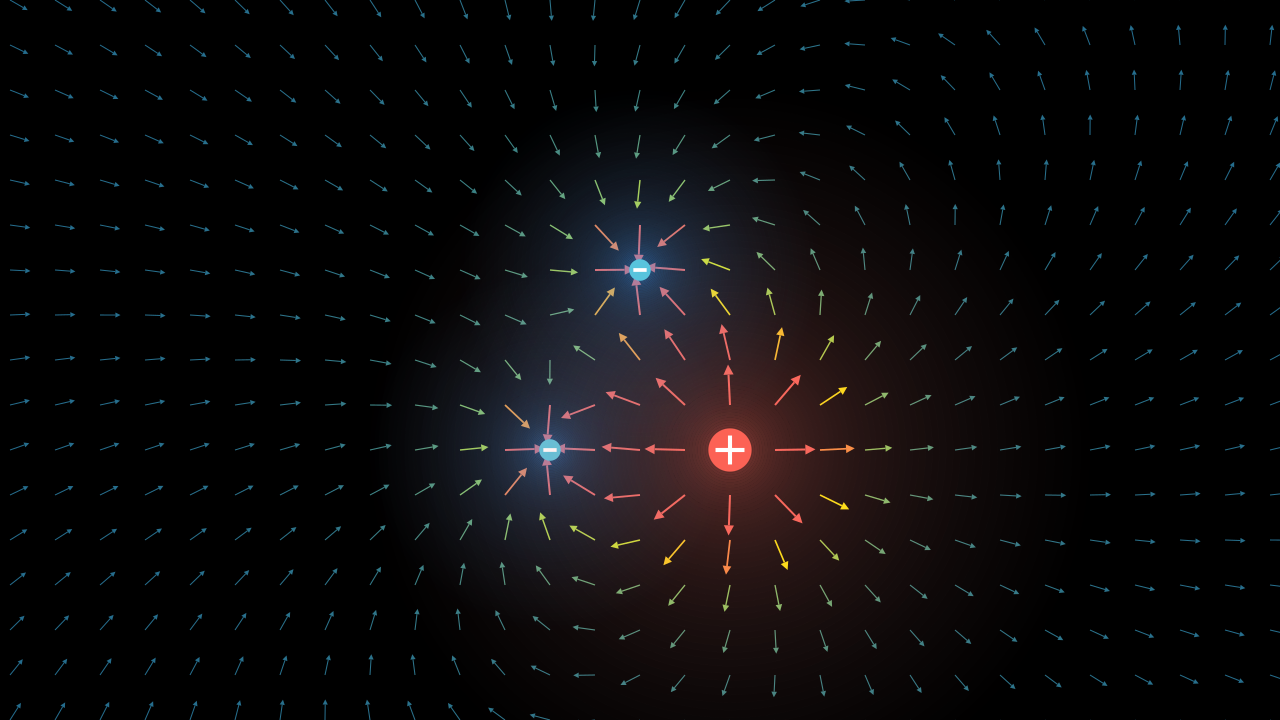

In [48]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        charge1 = Charge(-1, LEFT + DOWN)
        charge2 = Charge(2, RIGHT + DOWN)
        charge3 = Charge(-1, UP)
        field = ElectricField(charge1, charge2, charge3)
        self.add(charge1, charge2, charge3)
        self.add(field)

In [46]:
from manim_physics import Lens, Ray

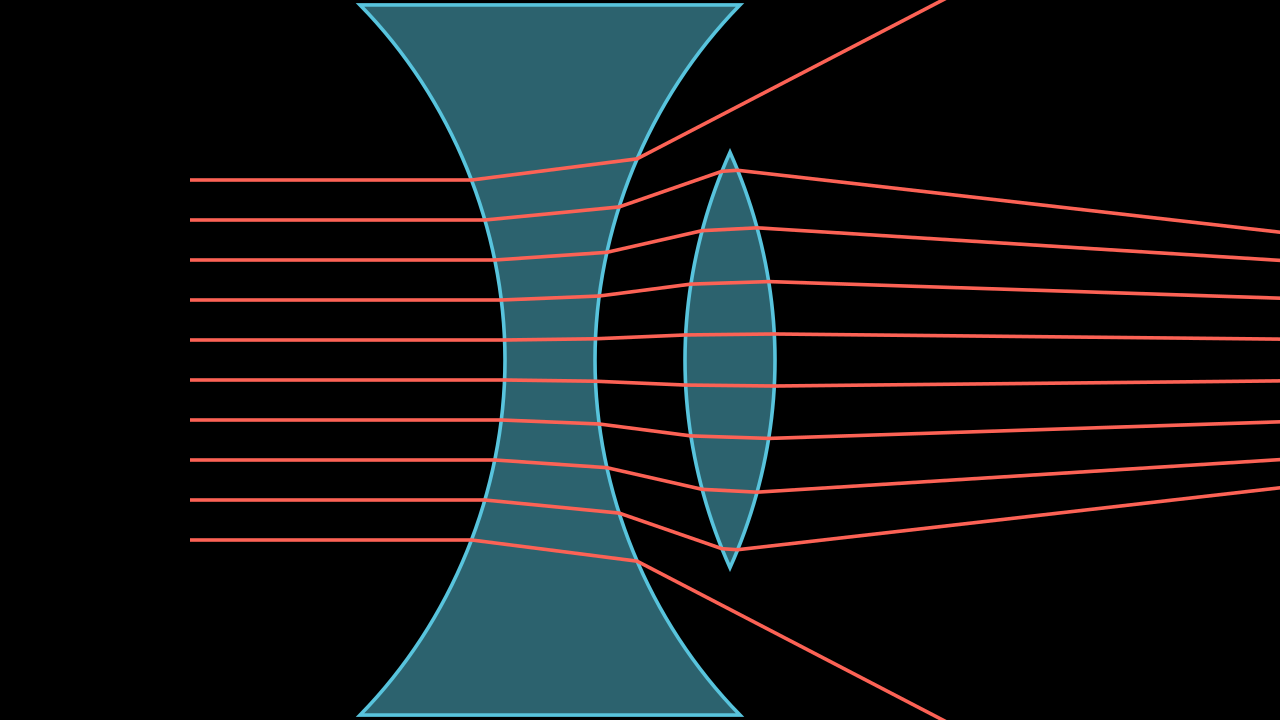

In [47]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        lens_style = {"fill_opacity": 0.5, "color": BLUE}
        a = Lens(-5, 1, **lens_style).shift(LEFT)
        a2 = Lens(5, 1, **lens_style).shift(RIGHT)
        b = [
            Ray(LEFT * 5 + UP * i, RIGHT, 8, [a, a2], color=RED)
            for i in np.linspace(-2, 2, 10)
        ]
        self.add(a, a2, *b)

#$